**Chapter 4 – Training Linear Models**

* Geron, Hands-On Machine Learning With Scikit-Learn and Tensorflow

_This notebook contains all the sample code and solutions to the exercices in chapter 4._

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)


# 5.1.2 Python

In [2]:
import numpy as np
m = 100
# random samples from a uniform distribution over [0, 1), size (100, 1)
np.random.seed(68)
X = 2 * np.random.rand(m, 1)  
# random.randn: a sample (or samples) from the “standard normal” distribution.
np.random.seed(76)
y = 4 + 3 * X + np.random.randn(m, 1)
print('X size', X.shape, ' y ', y.shape)

X size (100, 1)  y  (100, 1)


In [3]:
X[:10].T

array([[0.51874294, 0.0867221 , 1.16406068, 0.22502434, 1.22155356,
        0.59277592, 1.61450439, 0.18967547, 1.40020075, 1.86579205]])

In [4]:
np.random.seed(68)
X1 = 2 * np.random.rand(100, 1)
X1[:10].T

array([[0.51874294, 0.0867221 , 1.16406068, 0.22502434, 1.22155356,
        0.59277592, 1.61450439, 0.18967547, 1.40020075, 1.86579205]])

In [5]:
np.random.seed(76)
y1 = 4 + 3 * X + np.random.randn(100, 1)
print(y[:10].T)
print(y1[:10].T)

[[ 6.49653013  3.70253586  6.4326457   4.10343301  7.77275639  5.60400374
   8.66695348  4.75906329  6.9855606  11.05219381]]
[[ 6.49653013  3.70253586  6.4326457   4.10343301  7.77275639  5.60400374
   8.66695348  4.75906329  6.9855606  11.05219381]]


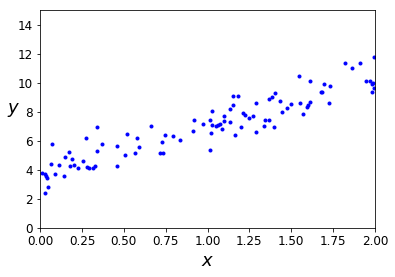

In [6]:
plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15]) # the size of the drawing area 
plt.savefig("data/generated_data_plot")
plt.show()

### solve the normal equation $\theta = (X^T X)^{-1} X^T y$

In [7]:
X_b = np.c_[np.ones((m, 1)), X]  # slide 4-2, add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [8]:
theta_best

array([[3.74570384],
       [3.31633466]])

In [9]:
X_new = np.array([[0], [2]]) # new test instances
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
print('X_new_b is\n ', X_new_b)
y_predict = X_new_b.dot(theta_best)
print('y_predict is\n ', y_predict)

X_new_b is
  [[1. 0.]
 [1. 2.]]
y_predict is
  [[ 3.74570384]
 [10.37837316]]


The above results: <br>
4.21509616 $\times$ 1 + 2.77011339 $\times$ 0 = 4.215096164 <br>
4.21509616 $\times$ 1 + 2.77011339 $\times$ 2 = 9.75532293

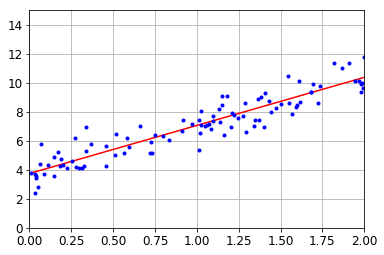

In [10]:
plt.plot(X_new, y_predict, "r-") # red 
plt.plot(X, y, "b.") # blue
plt.axis([0, 2, 0, 15])
plt.grid()
plt.savefig("data/lec05_linear_eqn")
plt.show()

The figure in the book actually corresponds to the following code, with a legend and axis labels:

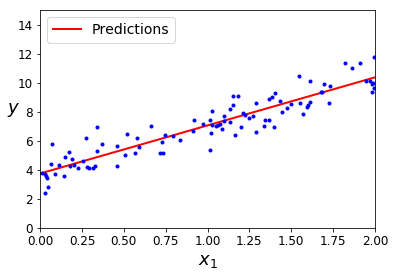

In [11]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.legend(loc="upper left", fontsize=14)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.savefig("data/linear_model_predictions")
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.74570384]), array([[3.31633466]]))

In [13]:
theta_best # from the above normal equation. These two should be the same.

array([[3.74570384],
       [3.31633466]])

In [14]:
lin_reg.predict(X_new)

array([[ 3.74570384],
       [10.37837316]])

# 5.2 Gradient Descent 

## 5.2.2 Batch Gradient Descent (批量梯度下降) $\frac{2}{m} X^T(X \theta - y)$

In [15]:
eta = 0.1 # learning rate
n_iterations = 1000 # 執行次數
m = 100
theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

# HW

In [16]:
# Slide: norm (範數) of the gradient vector < a tiny (微小的) number ϵ (epsilon)
# epsilon = 10**(-10)
# gradients = np.random.randn(2,1)
# while numpy.linalg.norm(gradients) > epsilon:
#   gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
#   theta = theta - eta * gradients

In [17]:
import numpy 
numpy.ones((2,1))

array([[1.],
       [1.]])

In [18]:
numpy.random.randn(2,1) 

array([[-1.41115395],
       [ 1.05155807]])

In [19]:
10**(-10)

1e-10

https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.randn.html

In [20]:
import numpy as np
np.random.randn(2,1)

array([[-0.33093573],
       [-0.42583323]])

In [21]:
theta_best # by normal equation 

array([[3.74570384],
       [3.31633466]])

In [22]:
theta # by Batch Gradient Descent, the same as the above

array([[3.74570384],
       [3.31633466]])

In [23]:
X_new_b.dot(theta)

array([[ 3.74570384],
       [10.37837316]])

Gradient Descent with various learning rates: Linear regression

* https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

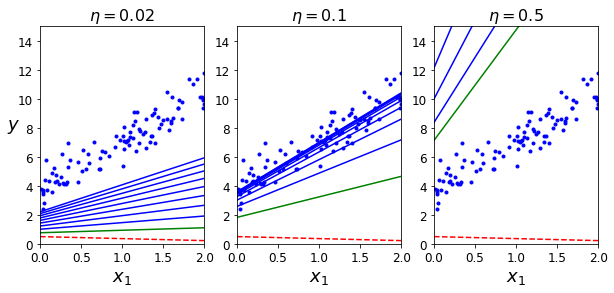

In [24]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.") # 藍點
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10: # Show the first 10 steps
            y_predict = X_new_b.dot(theta)
            style = "r--" if iteration == 0 else ("g" if iteration == 1 else "b-")
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02) # call the above function
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.savefig("data/gradient_descent_plot")
plt.show()

On the left, the learning rate is too low: the algorithm will eventually reach the solution,
but it will take a long time. In the middle, the learning rate looks pretty good: in
just a few iterations, it has already converged to the solution. On the right, the learning
rate is too high: the algorithm diverges, jumping all over the place and actually
getting further and further away from the solution at every step.

Q: On the left, the learning rate is too low: the algorithm will eventually reach the solution, but it will take a long time. <font color="red">Really?</font>

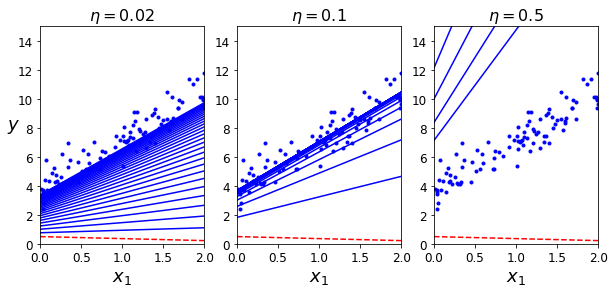

In [25]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.") # 藍點
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 30: # Show the first 30 steps
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02) # call the above function
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.savefig("data/lec05 gradient_descent_plot")
plt.show()

Q: <font color="red">which is which?</font>

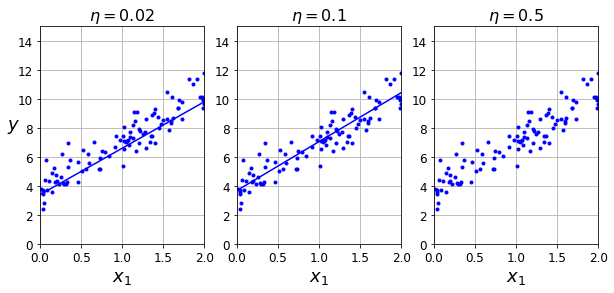

In [26]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.") # 藍點
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration == 30: # Show the 30th step
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02) # call the above function
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.grid() # I add this.
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.grid()
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.grid()
plt.savefig("data/lec05 gradient_descent_plot")
plt.show()

observe the intercepts

## 5.2.2 Stochastic Gradient Descent

In [27]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)
m

100

In [28]:
np.random.seed(139)
theta = np.random.randn(2,1)  # random initialization

print(theta)

[[ 1.64772631]
 [-0.05880282]]


[[ 1.64772631]
 [-0.05880282]]


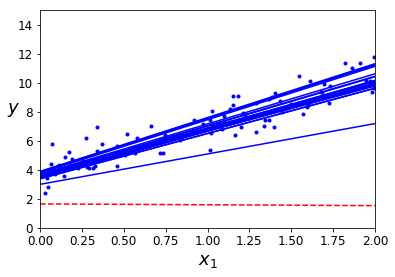

In [29]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(139)
theta = np.random.randn(2,1)  # random initialization

print(theta)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)          # pick a random index
        xi = X_b[random_index:random_index+1]        # pick a random one      
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
plt.savefig("data/lec5_sgd_plot")                    # not shown
plt.show()                                           # not shown

In [30]:
theta_best # values from the above normal equation 

array([[3.74570384],
       [3.31633466]])

In [31]:
theta

array([[3.73179807],
       [3.34686832]])

In [32]:
import numpy
numpy.linalg.norm(theta_best - theta )

0.033551079523761636

percentage is better

In [33]:
numpy.linalg.norm(theta_best - theta ) / numpy.linalg.norm(theta_best)

0.0067064113837883976

### By using toolbox from python

* To perform Linear Regression using SGD with Scikit-Learn, you can use the SGDRegressor class, which defaults to optimizing the squared error cost function. The following code runs 50 epochs, starting with a learning rate of 0.1 (eta0=0.1), using the default learning schedule (different from the preceding one), and it does not use any regularization (penalty=None; more details on this shortly):

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

In [34]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 50, penalty = None,  learning_rate = 'optimal', random_state=139)
sgd_reg.fit(X, y) # .ravel())

C:\Users\hao\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='optimal',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=139, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [35]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 50, penalty = None,  learning_rate = 'optimal', random_state=139)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='optimal',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=139, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [36]:
sgd_reg.intercept_, sgd_reg.coef_

(array([1.29736299e+12]), array([1.1333028e+11]))

In [37]:
sgd_reg.intercept_[0]

1297362986815.2039

In [38]:
theta_sgd = np.array(([sgd_reg.intercept_[0]], [sgd_reg.coef_[0]]))
theta_sgd

array([[1.29736299e+12],
       [1.13330280e+11]])

In [39]:
theta # by using our code

array([[3.73179807],
       [3.34686832]])

In [40]:
theta_best # values from the above normal equation

array([[3.74570384],
       [3.31633466]])

In [41]:
numpy.linalg.norm(theta_best - theta ) / numpy.linalg.norm(theta_best)

0.0067064113837883976

In [42]:
numpy.linalg.norm(theta_best - theta_sgd ) / numpy.linalg.norm(theta_best)

260313030482.8218

In [43]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 5000, penalty = None,  learning_rate = 'optimal', random_state=139)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.75889206]), array([3.3378402]))

## Add alpha

In [44]:
from sklearn.linear_model import SGDRegressor
sgd_reg1 = SGDRegressor(max_iter = 50, penalty = None, alpha = 0.1, learning_rate = 'optimal', random_state=139)
sgd_reg1.fit(X, y.ravel())
sgd_reg1.intercept_, sgd_reg1.coef_

(array([3.73945876]), array([3.32110452]))

In [45]:
from sklearn.linear_model import SGDRegressor
sgd_reg1 = SGDRegressor(max_iter = 500, penalty = None, alpha = 0.1, learning_rate = 'optimal', random_state=139)
sgd_reg1.fit(X, y.ravel())
sgd_reg1.intercept_, sgd_reg1.coef_

(array([3.74551818]), array([3.31647964]))

# 5.2.3  Mini-batch gradient descent

In [46]:
m = 10
n_iterations = 3
minibatch_size = 4 # S in the lecture note

for epoch in range(n_iterations):
    for i in range(0, m, minibatch_size): 
        print(epoch, i)

0 0
0 4
0 8
1 0
1 4
1 8
2 0
2 4
2 8


In [47]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20 # S in the lecture note
m = 100
np.random.seed(42)
theta_mb = np.random.randn(2,1)  # random initialization

t0, t1 = 10, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m) # m number of training instances
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2 * xi.T.dot(xi.dot(theta_mb) - yi)
        eta = learning_schedule(t)
        theta_mb = theta_mb - eta * gradients
        theta_path_mgd.append(theta_mb)

In [48]:
theta_best # values from the above normal equation

array([[3.74570384],
       [3.31633466]])

In [49]:
theta_mb

array([[3.75547643],
       [3.31316586]])

In [50]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

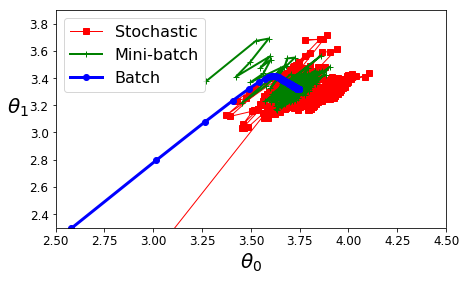

In [51]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.savefig("data/lec05_gradient_descent_paths_plot")
plt.show()

## 5.2.4 Local (區域) and global (廣域) minimum

* https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.linalg.html

In [52]:
import numpy.linalg
numpy.linalg.eigvals(([2, 0],[0, 2]))

array([2., 2.])

# 5.3 Polynomial regression

Return a sample (or samples) from the “standard normal” distribution. <br>
ref https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.randn.html

In [53]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

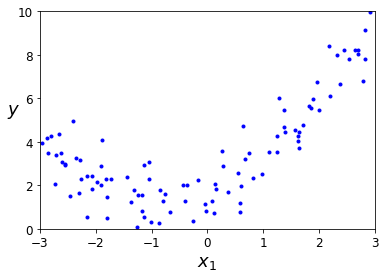

In [54]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
#save_fig("quadratic_data_plot")
plt.show()

* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [55]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [56]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [57]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

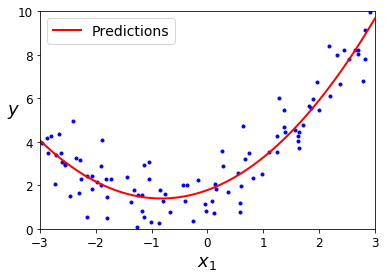

In [58]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
#save_fig("training_linear_models/quadratic_predictions_plot")
plt.show()

# 5.4 Learning curves

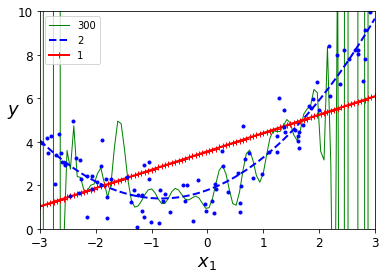

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg)
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.savefig("data/lec05 high_degree_polynomials_plot")
plt.show()

In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown
    
    return np.sqrt(train_errors), np.sqrt(val_errors)

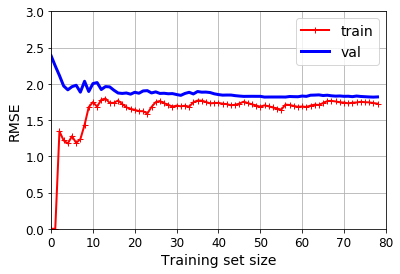

In [61]:
lin_reg = LinearRegression()
train_errors_sqrt, val_errors_sqrt = plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         
plt.grid()
plt.savefig("data/lec05 underfitting_learning_curves_plot")   # not shown
plt.show()                                      # not shown

In [62]:
print(train_errors_sqrt[75:])
print(val_errors_sqrt[75:])

[1.74667291 1.74445756 1.73538016 1.72683815]
[1.8223893  1.81918743 1.81688302 1.81961098]


In [63]:
abs(train_errors_sqrt[78] - val_errors_sqrt[78]) / train_errors_sqrt[78]

0.05372410103790786

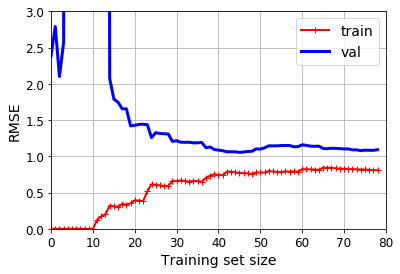

In [64]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

train_errors_sqrt, val_errors_sqrt = plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
plt.grid()
plt.savefig("data/lec05 learning_curves_plot")  # not shown
plt.show()                        # not shown

In [65]:
print(train_errors_sqrt[76:])
print(val_errors_sqrt[76:])

[0.81384053 0.80899334 0.80769541]
[1.08293063 1.08236688 1.09150266]


In [66]:
abs(train_errors_sqrt[78] - val_errors_sqrt[78]) / train_errors_sqrt[78]

0.35137906066527425

# quadratic 

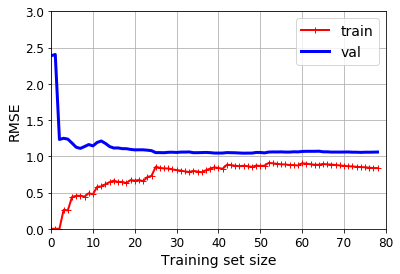

In [67]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

train_errors_sqrt, val_errors_sqrt = plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
plt.grid()
plt.savefig("data/lec05 learning_curves_plot")  # not shown
plt.show()                        # not shown

In [68]:
print(train_errors_sqrt[76:])
print(val_errors_sqrt[76:])

[0.84329224 0.83818949 0.8377079 ]
[1.05671046 1.05739917 1.05919642]


In [69]:
abs(train_errors_sqrt[78] - val_errors_sqrt[78]) / train_errors_sqrt[78]

0.2643982669004329

## 4.4.1 The Bias/Variance Tradeoff

https://gist.github.com/fagonzalezo/6819785

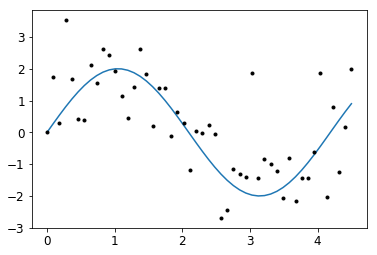

In [70]:
import numpy as np
import pylab as pl

def f(size):
    '''
    Returns a sample with 'size' instances without noise.
    '''
    x = np.linspace(0, 4.5, size)
    y = 2 * np.sin(x * 1.5)
    return (x,y)

def sample(size):
    '''
    Returns a sample with 'size' instances.
    '''
    x = np.linspace(0, 4.5, size)
    y = 2 * np.sin(x * 1.5) + pl.randn(x.size)
    return (x,y)
    
pl.clf()
f_x, f_y = f(50)
pl.plot(f_x, f_y)
x, y = sample(50)
pl.plot(x, y, 'k.')
pl.show()

In [71]:
from sklearn.linear_model import LinearRegression

def fit_polynomial(x, y, degree):
    '''
    Fits a polynomial to the input sample.
    (x,y): input sample
    degree: polynomial degree
    '''
    model = LinearRegression()
    model.fit(np.vander(x, degree + 1), y)
    return model

def apply_polynomial(model, x):
    '''
    Evaluates a linear regression model in an input sample
    model: linear regression model
    x: input sample
    '''
    degree = model.coef_.size - 1
    y = model.predict(np.vander(x, degree + 1))
    return y

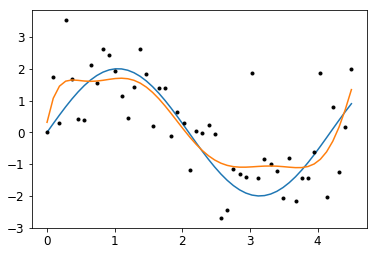

In [72]:
model8 = fit_polynomial(x, y, 8)
p_y8 = apply_polynomial(model8, x)
pl.plot(f_x, f_y)
pl.plot(x, y, 'k.')
pl.plot(x, p_y8)
pl.show()

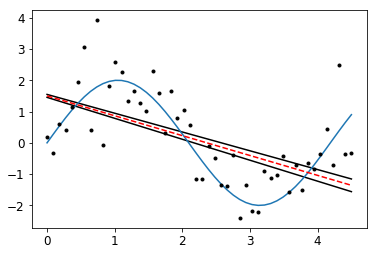

In [73]:
degree = 1
n_samples = 50
n_models = 2
avg_y = np.zeros(n_samples)
for i in range(n_models):
    (x,y) = sample(n_samples)
    model = fit_polynomial(x, y, degree)
    p_y = apply_polynomial(model, x)
    avg_y = avg_y + p_y
    pl.plot(x, p_y, 'k-')
avg_y = avg_y / n_models

f_x, f_y = f(50)
pl.plot(f_x, f_y)

pl.plot(x, y, 'k.')
pl.plot(x, avg_y, 'r--')
pl.show()

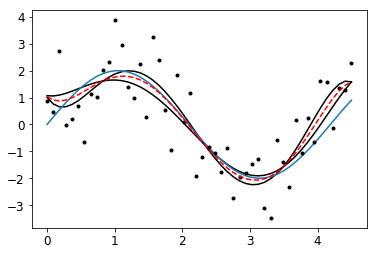

In [74]:
degree = 5
n_samples = 50
n_models = 2
avg_y = np.zeros(n_samples)
for i in range(n_models):
    (x,y) = sample(n_samples)
    model = fit_polynomial(x, y, degree)
    p_y = apply_polynomial(model, x)
    avg_y = avg_y + p_y
    pl.plot(x, p_y, 'k-')
avg_y = avg_y / n_models

f_x, f_y = f(50)
pl.plot(f_x, f_y)

pl.plot(x, y, 'k.')
pl.plot(x, avg_y, 'r--')
pl.show()

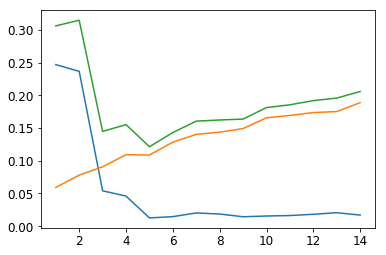

In [75]:
from numpy.linalg import norm
n_samples = 20
f_x, f_y = f(n_samples)
n_models = 100
max_degree = 15
var_vals =[]
bias_vals = []
error_vals = []
for degree in range(1, max_degree):
    avg_y = np.zeros(n_samples)
    models = []
    for i in range(n_models):
        (x,y) = sample(n_samples)
        model = fit_polynomial(x, y, degree)
        p_y = apply_polynomial(model, x)
        avg_y = avg_y + p_y
        models.append(p_y)
    avg_y = avg_y / n_models
    bias_2 = norm(avg_y - f_y)/f_y.size
    bias_vals.append(bias_2)
    variance = 0
    for p_y in models:
        variance += norm(avg_y - p_y)
    variance /= f_y.size * n_models
    var_vals.append(variance)
    error_vals.append(variance + bias_2)
pl.plot(range(1, max_degree), bias_vals, label='bias')
pl.plot(range(1, max_degree), var_vals, label='variance')
pl.plot(range(1, max_degree), error_vals, label='error')
#pl.legend()
pl.show()

# 5.5 Regularized models

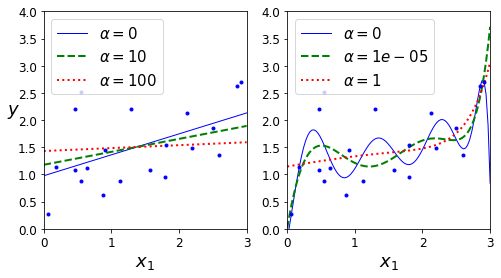

In [76]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.savefig("data/lec05 ridge_regression_plot")
plt.show()

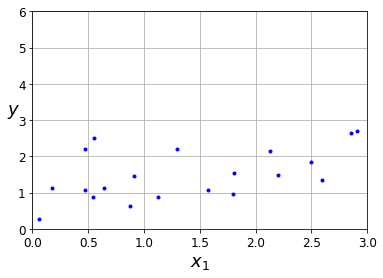

In [77]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 3, 0, 6])
plt.grid()
plt.savefig("data/lec05 Regularized models")
plt.show()

### linear regression 

In [78]:
poly_features = PolynomialFeatures(degree=1, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([0.97573667]), array([[0.3852145]]))

In [79]:
poly_features = PolynomialFeatures(degree=1, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = Ridge(10) # alpha = 10
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.17770894]), array([[0.23812306]]))

In [80]:
poly_features = PolynomialFeatures(degree=1, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = Ridge(100) # alpha = 100
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.43097916]), array([[0.05367258]]))

## polynomial with degree 10

In [81]:
poly_features = PolynomialFeatures(degree = 10, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([-0.19742123]),
 array([[   7.15337503,    9.2726931 ,  -34.92184598,  -85.8481434 ,
          336.97477809, -423.07867457,  271.03883476,  -95.65944018,
           17.72280598,   -1.34881442]]))

In [82]:
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = Ridge(10**-5) # alpha = 10**-5
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([-0.79550009]),
 array([[ 17.47957298, -30.11967597, -11.90446442,  57.14124219,
         -12.5170778 , -56.94977005,  60.18210379, -26.39155672,
           5.53663874,  -0.45670578]]))

In [83]:
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = Ridge(1) # alpha = 1
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.13459578]),
 array([[ 0.26161686,  0.05341538, -0.04483643, -0.06758984, -0.04696913,
         -0.00157853,  0.03752267,  0.02210197, -0.02438387,  0.00464292]]))

In [84]:
lin_reg.coef_[0][0]

0.2616168637920919

In [85]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [86]:
sgd_reg = SGDRegressor(penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

C:\Users\hao\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([1.13500145])

In [87]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

The penalty hyperparameter sets the type of regularization term to use. Specifying
"l2" indicates that you want SGD to add a regularization term to the cost function
equal to half the square of the ℓ2 norm of the weight vector: this is simply Ridge
Regression.

In [88]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

C:\Users\hao\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([1.13500145])

## 5.5.4 Lasso Regression Example

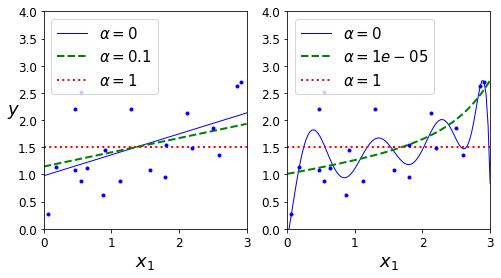

In [89]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-5, 1), tol=1, random_state=42)

plt.savefig("data/lec05 lasso_regression_plot")
plt.show()

In [90]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

C:\Users\hao\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


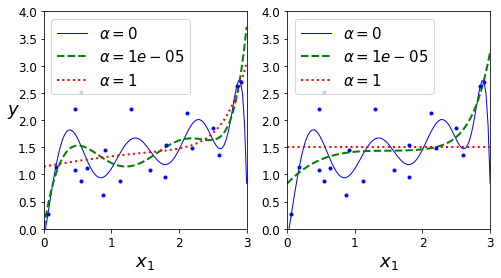

In [91]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.savefig("data/lec05 Ridge_lasso_regression_plot")
plt.show()

In [92]:
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = Ridge(10**-5) # alpha = 10**-5
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([-0.79550009]),
 array([[ 17.47957298, -30.11967597, -11.90446442,  57.14124219,
         -12.5170778 , -56.94977005,  60.18210379, -26.39155672,
           5.53663874,  -0.45670578]]))

In [93]:

poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = Lasso(10**-5) # alpha = 10**-5
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

C:\Users\hao\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


(array([0.83381424]),
 array([ 1.30817652e+00, -9.76697891e-01,  2.38190425e-01,  2.13717182e-02,
        -5.32952994e-03, -2.51801779e-03, -5.19078314e-04, -2.63825131e-07,
         5.96234097e-05,  3.75434931e-05]))

## 5.1.3 Elastic Net (彈性網)

In [94]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## <font color="red">HW 5.1</font> 

* Collinear: reduced by Lasso

# 5.5.6 Cross-validation (交叉驗證)

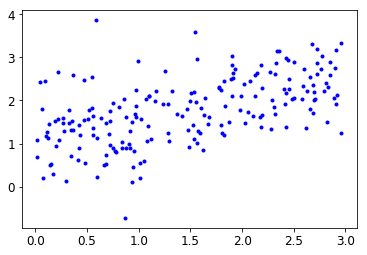

In [101]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 200
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
plt.plot(X, y, "b.", linewidth=3)
plt.show()

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.1)
lr = LinearRegression(normalize=True)
lr.fit(X_train, Y_train)
lr.score(X_test, Y_test)

0.5350804285085133

In [105]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X, y, cv=7, scoring='neg_mean_squared_error')
scores

array([-0.42964479, -0.48874711, -0.47436677, -0.62881419, -0.36762758,
       -0.25921333, -0.29639295])

In [106]:
scores.mean(), scores.std()

(-0.42068667351292266, 0.11664899973262009)

## 5.1.4 Early Stopping

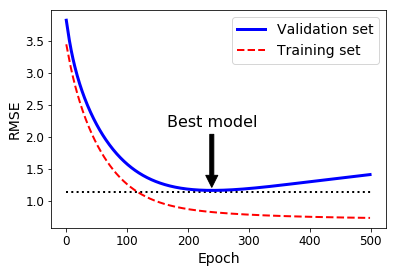

In [95]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train_predict, y_train))
    val_errors.append(mean_squared_error(y_val_predict, y_val))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.savefig("data/lec05 early_stopping_plot")
plt.show()

In [96]:
from sklearn.base import clone
sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [97]:
best_epoch, best_model

(239, SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
        fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
        loss='squared_loss', max_iter=1, n_iter=None, penalty=None,
        power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
        warm_start=True))

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [99]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

# ignoring bias term
t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[-1, 1], [-0.3, -1], [1, 0.1]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

C:\Users\hao\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


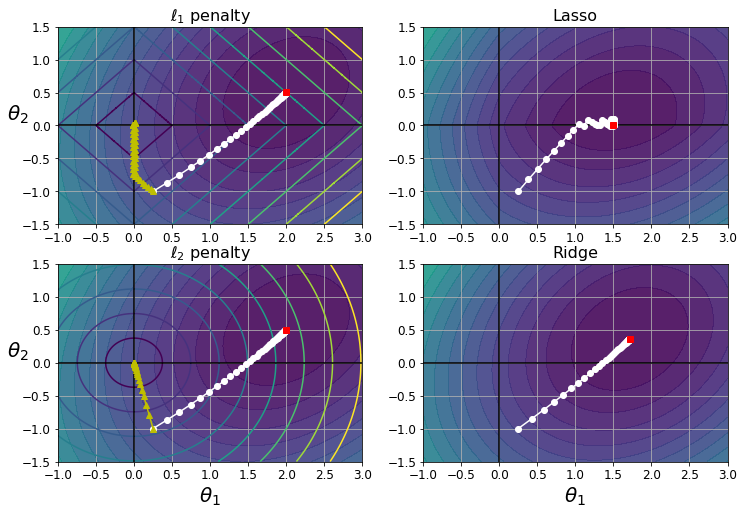

In [100]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.1, n_iterations = 50):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + 2 * l2 * theta

        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

plt.figure(figsize=(12, 8))
for i, N, l1, l2, title in ((0, N1, 0.5, 0, "Lasso"), (1, N2, 0,  0.1, "Ridge")):
    JR = J + l1 * N1 + l2 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(t_init, Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    plt.subplot(221 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, J, levels=levelsJ, alpha=0.9)
    plt.contour(t1, t2, N, levels=levelsN)
    plt.plot(path_J[:, 0], path_J[:, 1], "w-o")
    plt.plot(path_N[:, 0], path_N[:, 1], "y-^")
    plt.plot(t1_min, t2_min, "rs")
    plt.title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])

    plt.subplot(222 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    plt.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    plt.plot(t1r_min, t2r_min, "rs")
    plt.title(title, fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])

for subplot in (221, 223):
    plt.subplot(subplot)
    plt.ylabel(r"$\theta_2$", fontsize=20, rotation=0)

for subplot in (223, 224):
    plt.subplot(subplot)
    plt.xlabel(r"$\theta_1$", fontsize=20)

plt.savefig("data/lec05 lasso_vs_ridge_plot")
plt.show()